In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [2]:
start = '2015-12-31'
end= '2025-12-28'
stock = 'GOOG'
data = yf.download(stock,start,end)

C:\Users\rashm\AppData\Local\Temp\ipykernel_3100\1852849561.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(stock,start,end)
[*********************100%***********************]  1 of 1 completed


In [10]:
ma_100_days=data.Close.rolling(100).mean()

In [4]:
data.reset_index(inplace=True) #instead of date we hace indices 0,1,2...

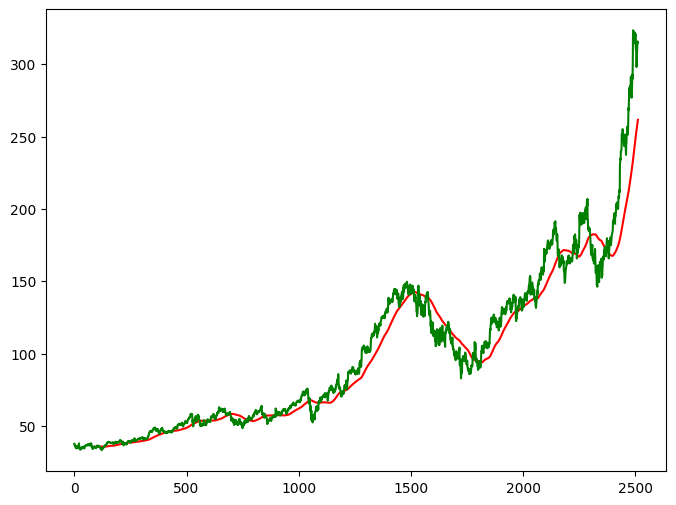

In [11]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days,'r')
plt.plot(data.Close,'g')
plt.show()

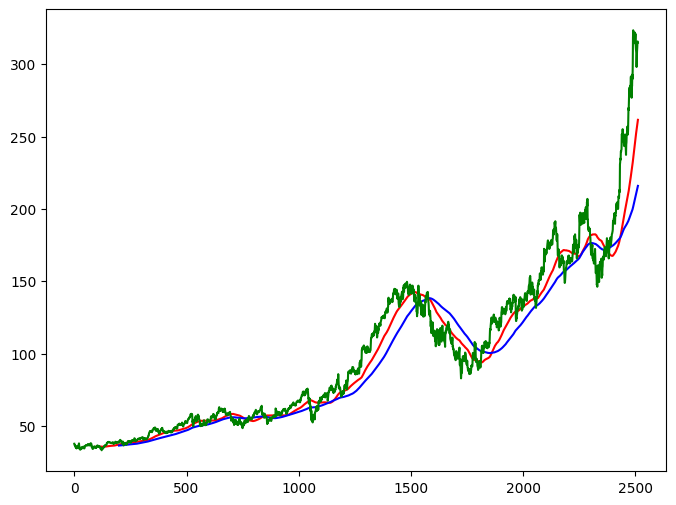

In [9]:
ma_200_days=data.Close.rolling(200).mean()
plt.figure(figsize=(8,6))
plt.plot(ma_100_days,'r')
plt.plot(ma_200_days,'b')
plt.plot(data.Close,'g')
plt.show()

In [12]:
 data.dropna(inplace=True)

In [15]:
data_train=pd.DataFrame(data.Close[0:int(len(data)*0.80)])
data_test=pd.DataFrame(data.Close[int(len(data)*0.80):len(data)])

In [16]:
data_train.shape[0]

2009

In [18]:
data_test.shape[0]

503

In [19]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))

In [20]:
data_train_scale=scaler.fit_transform(data_train)

In [21]:
x=[]
y=[]

for i in range (100,data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])

In [25]:
x,y=np.array(x),np.array(y)

In [26]:
from keras.layers import Dense,Dropout, LSTM
from keras.models import Sequential

In [27]:
model=Sequential()
model.add(LSTM(units=50,activation='relu' , return_sequences=True,input_shape=((x.shape[1],1))))
model.add(Dropout(0.2))

model.add(LSTM(units=60,activation = 'relu' , return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80,activation='relu',return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120,activation='relu',return_sequences=True))
model.add(Dropout(0.5))

model.add(Dense(units=1))

C:\Users\rashm\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [28]:
model.compile(optimizer='adam',loss='mean_squared_error')

In [29]:
model.fit(x,y,epochs=50,batch_size=32,verbose=1)

Epoch 1/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 10s 88ms/step - loss: 0.1132
Epoch 2/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 84ms/step - loss: 0.0934
Epoch 3/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 85ms/step - loss: 0.0927
Epoch 4/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 88ms/step - loss: 0.0914
Epoch 5/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 85ms/step - loss: 0.0910
Epoch 6/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 85ms/step - loss: 0.0902
Epoch 7/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 88ms/step - loss: 0.0899
Epoch 8/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 6s 92ms/step - loss: 0.0897
Epoch 9/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 6s 92ms/step - loss: 0.0896
Epoch 10/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 6s 91ms/step - loss: 0.0894
Epoch 11/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 6s 92ms/step - loss: 0.0892
Epoch 12/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 6s 95ms/step - loss: 0.0886
Epoch 13/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 6s 92ms/step - loss: 0.0886
Epoch 14/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 6s 92ms/step - loss: 0.0885
Epoch 15/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 6s 92ms/step - loss: 0.0882
Epo

In [30]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 100, 120)            │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 100, 120)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 100, 1)              │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 536,285 (2.05 MB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 357,524 (1.36 MB)

In [31]:
pas_100_days=data_train.tail(100)
data_test=pd.concat([pas_100_days, data_test],ignore_index=True)

In [33]:
data_test_scale=scaler.fit_transform(data_test)

In [35]:
x=[]
y=[]

for i in range (100,data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])

x,y=np.array(x),np.array(y)

In [36]:
y_predict = model.predict(x)

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step


In [58]:
scale = 1/scaler.scale_

In [59]:
y_predict = y_predict*scale

In [60]:
y = y*scale

ValueError: x and y can be no greater than 2D, but have shapes (503,) and (503, 100, 1)

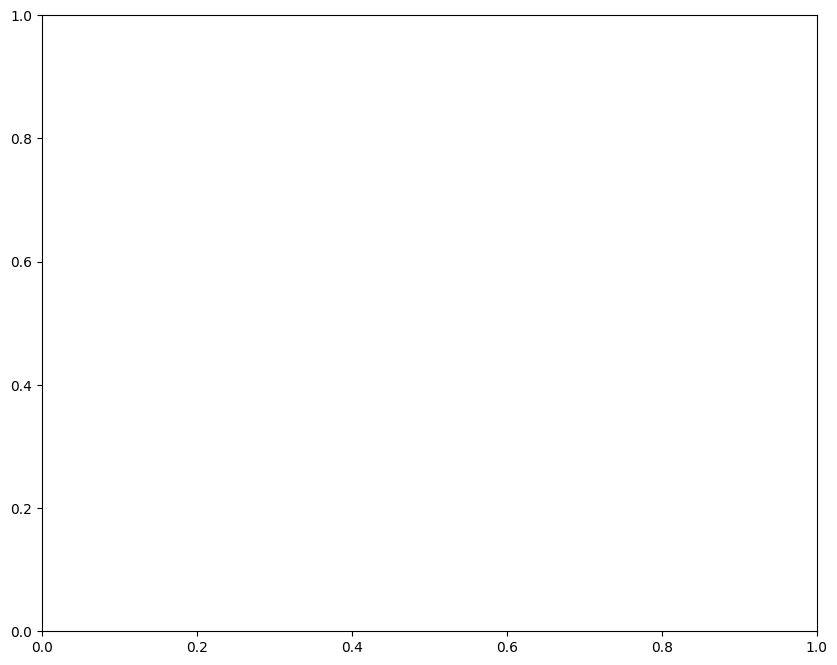

In [61]:
plt.figure(figsize=(10,8))
plt.plot(y_predict,'r',label='Predicted Price')
plt.plot(y,'g',label='Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()